Italy exponential modeling

Data from https://github.com/CSSEGISandData/COVID-19


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
"deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')"
"recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')"

"recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')"

In [3]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,50,53,59,70,75,82,114,147
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,461,502,511,581,639,639,701,773,839,825
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,138,150,150,160,178,178,200,212,226,243
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,93,99,117,129,149,149,197,238,428,566


In [4]:
confirmed.drop(['Province/State','Lat', 'Long'], axis = 1, inplace = True)

In [5]:
confirmed = confirmed.set_index('Country/Region')
confirmed = confirmed.T
confirmed.head()

Country/Region,Thailand,Japan,Singapore,Nepal,Malaysia,Canada,Australia,Australia,Australia,Cambodia,...,Benin,Greenland,Liberia,Netherlands,Republic of the Congo,Somalia,Tanzania,The Bahamas,US,United Kingdom
1/22/20,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,3,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/24/20,5,2,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/25/20,7,2,3,1,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/26/20,8,4,4,1,4,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0


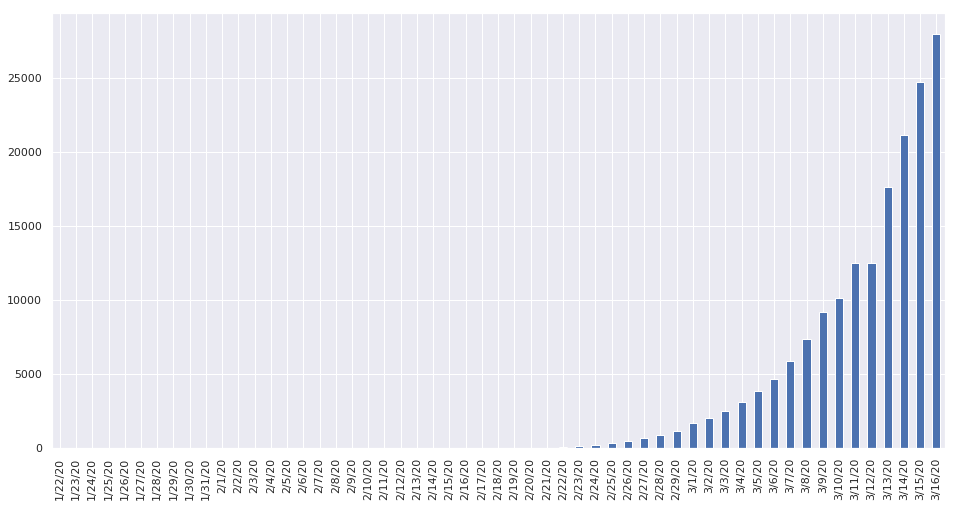

In [6]:
confirmed['Italy'].plot(kind = 'bar', figsize = (16, 8))

In [7]:
from scipy import optimize

def exponential_function(x, a, b, c):
    return a * (b ** x) + c

X, y = list(range(len(confirmed))), confirmed['Italy'].tolist()
params, _ = optimize.curve_fit(exponential_function, X, y)

print('Estimated function: {0:.3f} * ({1:.3f} ^ X) + {2:.3f}'.format(*params))

Estimated function: 2.115 * (1.193 ^ X) + -167.651


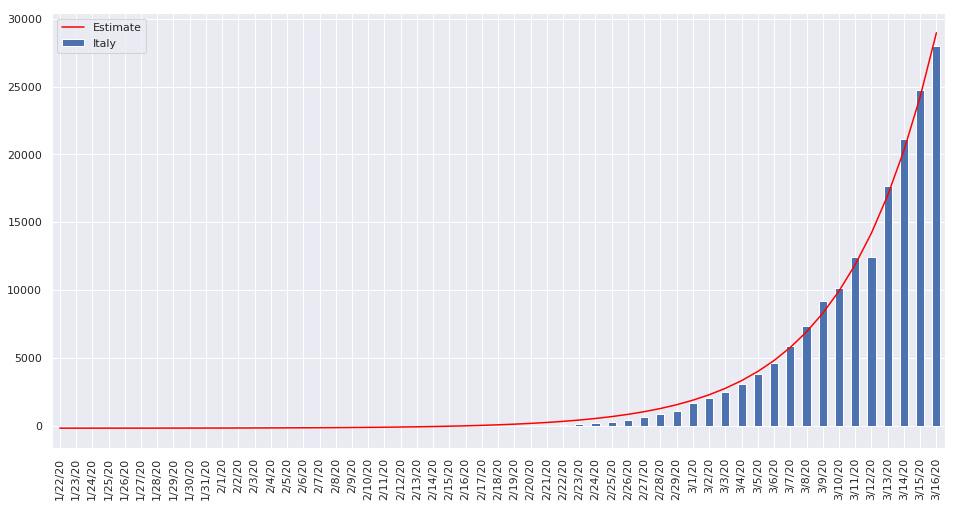

In [8]:
ax = confirmed['Italy'].plot(kind='bar', figsize=(16, 8))
estimate = [exponential_function(x, *params) for x in X]
ax.plot(confirmed.index, estimate, color='red', label='Estimate')
ax.legend()